<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Veri yolları
data_paths = {
    'Control-Axial': '/content/drive/MyDrive/Multiple Sclerosis-Proje Tasarımı/Multiple Sclerosis/Control-Axial',
    'Control-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis-Proje Tasarımı/Multiple Sclerosis/Control-Sagittal',
    'MS-Axial': '/content/drive/MyDrive/Multiple Sclerosis-Proje Tasarımı/Multiple Sclerosis/MS-Axial',
    'MS-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis-Proje Tasarımı/Multiple Sclerosis/MS-Sagittal'
}

# Görüntü boyutları ve veri artırma parametreleri
img_width, img_height = 224, 224
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Görüntüleri yükleme ve ön işleme fonksiyonu
def load_and_preprocess_images(data_path, img_width, img_height, augment=False, n_augmented=0):
    images = []
    for img_file in os.listdir(data_path):
        img_path = os.path.join(data_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_width, img_height))
        img = img / 255.0
        images.append(img)

        if augment:
            img = img.reshape((1, img_width, img_height, 1))
            aug_iter = datagen.flow(img, batch_size=1)
            for _ in range(n_augmented):
                aug_img = next(aug_iter)[0].reshape(img_width, img_height)
                images.append(aug_img)

    return images

# Veri yükleme ve veri artırma işlemleri
all_images = []
all_labels = []
for label, path in data_paths.items():
    if label == 'MS-Axial':
        n_augment = 10  # ModerateDemented için daha fazla veri artırma
    else:
        n_augment = 3 if label == 'MS-Axial' else 0

    images = load_and_preprocess_images(path, img_width, img_height, augment=(n_augment > 0), n_augmented=n_augment)
    all_images.extend(images)
    all_labels.extend([label] * len(images))  # Etiketleri ekle

# Numpy dizisine dönüştürme
all_images = np.array(all_images)
all_labels = np.array(all_labels)

print("Toplam yüklenen ve artırılan görüntü sayısı:", len(all_images))

# İşlenmiş görüntülerden örnekleri görselleştirme
def visualize_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        idx = np.random.randint(0, len(images))
        img = images[idx]
        label = labels[idx]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Toplam yüklenen ve artırılan görüntü sayısı: 9987


In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Veri yolları
data_paths = {
    'MildDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/MildDemented',
    'ModerateDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/ModerateDemented',
    'NonDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/NonDemented',
    'VeryMildDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/VeryMildDemented'
}

# Görüntü boyutları ve veri artırma parametreleri
img_width, img_height = 224, 224
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Görüntüleri yükleme ve ön işleme fonksiyonu
def load_and_preprocess_images(data_path, img_width, img_height, augment=False, n_augmented=0):
    images = []
    for img_file in os.listdir(data_path):
        img_path = os.path.join(data_path, img_file)

        # Görüntüyü yükle, boyutlandır ve normalleştir
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_width, img_height))
        img = img / 255.0
        images.append(img)

        # Veri artırma
        if augment:
            img = img.reshape((1, img_width, img_height, 1))
            aug_iter = datagen.flow(img, batch_size=1)
            for _ in range(n_augmented):
                aug_img = next(aug_iter)[0].reshape(img_width, img_height)
                images.append(aug_img)

    return images

# Her kategori için görüntü sayılarını hesaplama
kategoriye_gore_goruntu_sayilari = {}
for label, path in data_paths.items():
    goruntu_sayisi = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    kategoriye_gore_goruntu_sayilari[label] = goruntu_sayisi

# En yüksek görüntü sayısına sahip kategori
max_goruntu_sayisi = max(kategoriye_gore_goruntu_sayilari.values())

# Veri yükleme ve veri artırma işlemleri
all_images = []
all_labels = []
for label, path in data_paths.items():
    current_goruntu_sayisi = kategoriye_gore_goruntu_sayilari[label]

    # Eksik olan görüntü sayısını hesapla ve ona göre veri artırma miktarını belirle
    eksik_goruntu_sayisi = max_goruntu_sayisi - current_goruntu_sayisi
    n_augment = eksik_goruntu_sayisi // current_goruntu_sayisi

    images = load_and_preprocess_images(path, img_width, img_height, augment=(n_augment > 0), n_augmented=n_augment)
    all_images.extend(images)
    all_labels.extend([label] * len(images))  # Etiketleri ekle

# Numpy dizisine dönüştürme
all_images = np.array(all_images)
all_labels = np.array(all_labels)

print("Toplam yüklenen ve artırılan görüntü sayısı:", len(all_images))

# İşlenmiş görüntülerden örnekleri görselleştirme
def visualize_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        idx = np.random.randint(0, len(images))
        img = images[idx]
        label = labels[idx]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Örnek görüntüleri görselleştirme
visualize_sample_images(all_images, all_labels)

Control-Axial için işlenen görüntülerin görselleştirmesi:


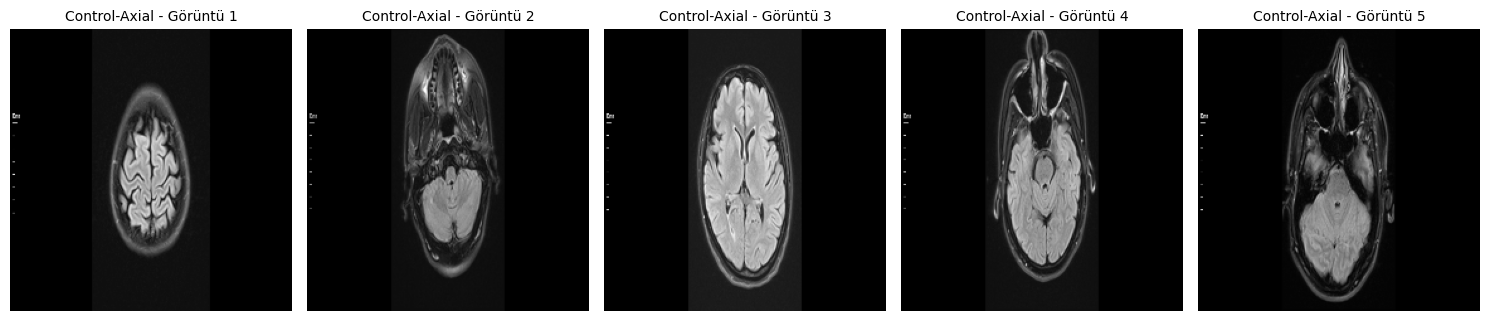

Control-Sagittal için işlenen görüntülerin görselleştirmesi:


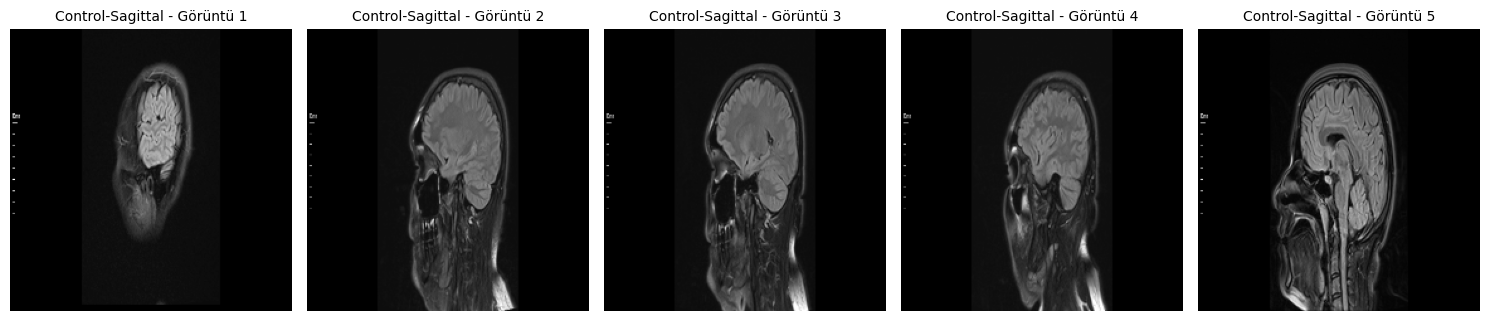

MS-Axial için işlenen görüntülerin görselleştirmesi:


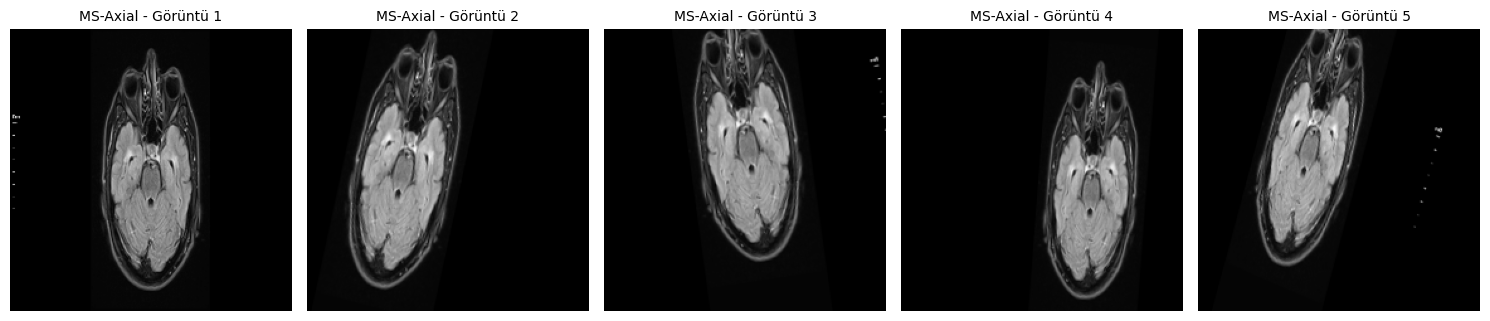

MS-Sagittal için işlenen görüntülerin görselleştirmesi:


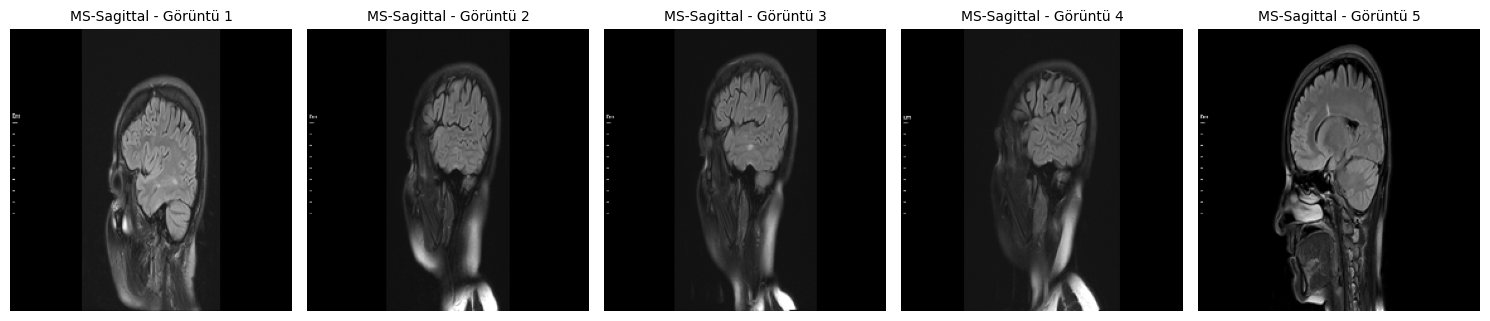

In [2]:
import matplotlib.pyplot as plt

# İşlenmiş görüntü örneklerini görselleştirme fonksiyonu
def visualize_processed_images(all_images, all_labels, num_samples=5):
    unique_labels = np.unique(all_labels)
    for label in unique_labels:
        print(f"{label} için işlenen görüntülerin görselleştirmesi:")
        label_indices = np.where(all_labels == label)[0]
        if len(label_indices) > 0:
            plt.figure(figsize=(15, 5))  # Yüksekliği artırdık
            for i in range(min(num_samples, len(label_indices))):
                idx = label_indices[i]
                img = all_images[idx]

                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img, cmap='gray')
                plt.title(f"{label} - Görüntü {i+1}", fontsize=10)  # Yazı boyutunu küçülttük
                plt.axis('off')
            plt.tight_layout()  # Düzenli bir layout sağlar
            plt.show()

# Toplam ve kategoriye göre yüklenen görüntü sayısını yazdırma fonksiyonu
def print_image_counts(all_labels):
    unique_labels = np.unique(all_labels)
    print(f"Toplam yüklenen görüntü sayısı: {len(all_images)}")
    for label in unique_labels:
        count = np.sum(all_labels == label)
        print(f"{label}: {count} görüntü")

# Fonksiyonları çağır
visualize_processed_images(all_images, all_labels)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image
import numpy as np

# Yukarıda verilen görüntü yükleme ve işleme kodundan sonra...

# Etiketleri ve Görüntüleri Birleştirme
tum_goruntuler = all_images
tum_etiketler = all_labels

# Veri Setlerini Bölme
X_train, X_temp, y_train, y_temp = train_test_split(tum_goruntuler, tum_etiketler, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Etiketleri One-Hot Encoding İle Dönüştürme
unique_etiketler = list(set(tum_etiketler))
etiket_map = {etiket: index for index, etiket in enumerate(unique_etiketler)}
y_train_encoded = to_categorical([etiket_map[etiket] for etiket in y_train], num_classes=len(unique_etiketler))
y_val_encoded = to_categorical([etiket_map[etiket] for etiket in y_val], num_classes=len(unique_etiketler))
y_test_encoded = to_categorical([etiket_map[etiket] for etiket in y_test], num_classes=len(unique_etiketler))

# Hedef klasör yollarını ve alt klasörlerini oluşturma
hedef_klasorler = {
    'train': '/content/drive/MyDrive/Proje Tasarımı/Split/Train',
    'val': '/content/drive/MyDrive/Proje Tasarımı/Split/Validation',
    'test': '/content/drive/MyDrive/Proje Tasarımı/Split/Test'
}

for ana_klasor in hedef_klasorler.values():
    for etiket in unique_etiketler:
        os.makedirs(os.path.join(ana_klasor, etiket), exist_ok=True)

# Görüntüleri ilgili klasörlere kaydetme fonksiyonu
def goruntuleri_kaydet(goruntuler, etiketler, ana_hedef_klasor):
    for i, (goruntu, etiket) in enumerate(zip(goruntuler, etiketler)):
        goruntu_img = Image.fromarray((goruntu * 255).astype(np.uint8))

        hedef_klasor = os.path.join(ana_hedef_klasor, etiket)
        goruntu_adi = f"{i}.png"
        goruntu_yolu = os.path.join(hedef_klasor, goruntu_adi)
        goruntu_img.save(goruntu_yolu)

# Eğitim, doğrulama ve test setlerini kaydetme
goruntuleri_kaydet(X_train, y_train, hedef_klasorler['train'])
goruntuleri_kaydet(X_val, y_val, hedef_klasorler['val'])
goruntuleri_kaydet(X_test, y_test, hedef_klasorler['test'])

In [7]:
import os

def klasor_icerigini_goster(ana_klasor):
    try:
        alt_klasorler = os.listdir(ana_klasor)
    except FileNotFoundError:
        print(f"Hata: '{ana_klasor}' yolu bulunamadı.")
        return

    for alt_klasor in alt_klasorler:
        klasor_yolu = os.path.join(ana_klasor, alt_klasor)
        try:
            dosyalar = os.listdir(klasor_yolu)
        except NotADirectoryError:
            # Eğer klasor_yolu bir dizin değilse, bu hatayı yakala
            print(f"'{klasor_yolu}' bir dizin değil.")
            continue
        dosya_sayisi = len(dosyalar)
        print(f"Klasör: {alt_klasor}, Toplam Dosya Sayısı: {dosya_sayisi}")

# Test, validation ve train klasörleri için çıktıları göster
klasorler = {
    'train': '/content/drive/MyDrive/Proje Tasarımı/Split/Train',
    'val': '/content/drive/MyDrive/Proje Tasarımı/Split/Validation',
    'test': '/content/drive/MyDrive/Proje Tasarımı/Split/Test'
}

for klasor, yol in klasorler.items():
    print(f"{klasor.capitalize()} Klasörü İçeriği:")
    klasor_icerigini_goster(yol)
    print("\n" + "-"*50 + "\n")


Train Klasörü İçeriği:
Klasör: Control-Sagittal, Toplam Dosya Sayısı: 619
Klasör: MS-Sagittal, Toplam Dosya Sayısı: 464
Klasör: Control-Axial, Toplam Dosya Sayısı: 599
Klasör: MS-Axial, Toplam Dosya Sayısı: 4310

--------------------------------------------------

Val Klasörü İçeriği:
Klasör: Control-Sagittal, Toplam Dosya Sayısı: 207
Klasör: MS-Sagittal, Toplam Dosya Sayısı: 154
Klasör: Control-Axial, Toplam Dosya Sayısı: 204
Klasör: MS-Axial, Toplam Dosya Sayısı: 1432

--------------------------------------------------

Test Klasörü İçeriği:
Klasör: Control-Sagittal, Toplam Dosya Sayısı: 228
Klasör: MS-Sagittal, Toplam Dosya Sayısı: 143
Klasör: Control-Axial, Toplam Dosya Sayısı: 219
Klasör: MS-Axial, Toplam Dosya Sayısı: 1408

--------------------------------------------------

